In [1]:
####################################
# Special code for Jupyter Notebook
####################################
# Show plots in the notebook

#%matplotlib inline 
%matplotlib notebook 



# Automatically reload any packages that changed
#%load_ext autoreload
#%autoreload 2

# Display multiple arguments
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

##################
# Import librarys
##################
# Third party libraries

import os
import sys
import glob
import pandas as pd
import numpy as np
import pprint
import statistics as stat
import scipy as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import rainflow
import OrcFxAPI


# Python libraries
module_path = r"C:\Users\snod\OneDrive\CloudStation\DTU\Master in Wind Energy\06 - Master Thesis\19 - python modules"
sys.path.append(module_path)

import stephan_py as st
import pywasp_edu as pw


############################################
# Limit number of rows to print from Pandas
############################################
pd.options.display.max_rows = 40

pi = np.arccos(-1)

#plt.rcParams['figure.figsize'] = [300, 200]

# Used in order to embed figures in the text
from IPython.display import Image  

# Plots of DELs from Orcaflex simulations



In [2]:
# Read GWA details
print(os.getcwd())
os.chdir(r'D:\100 - Project files\02 - Orcaflex Runs')
print(os.getcwd())
gwa_df = pd.read_csv(r'weibull_prob.csv',index_col=0)

gwa_df


gwa_df.iloc[12][5:].sum()

D:\100 - Project files\02 - Orcaflex Runs
D:\100 - Project files\02 - Orcaflex Runs


,DIR,Freq. [%],A,k,Umean,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0
0,0.0,8.75,10.180000,2.119000,9.02,0.126474,0.164965,0.173312,0.155135,0.121194,0.083639,0.051335,0.028132,0.013798,0.006065,0.002391
1,30.0,3.28,6.560000,1.799000,5.83,0.241461,0.216420,0.154056,0.091641,0.046696,0.020681,0.008038,0.002761,0.000842,0.000229,0.000056
2,60.0,2.43,6.050000,1.885000,5.37,0.268520,0.229416,0.147354,0.075057,0.031102,0.010640,0.003034,0.000726,0.000147,0.000025,0.000004
3,90.0,3.66,7.300000,1.662000,6.52,0.209285,0.193240,0.150870,0.104129,0.064936,0.037065,0.019532,0.009561,0.004368,0.001869,0.000752
4,120.0,7.69,13.420000,1.998000,11.89,0.080962,0.108625,0.123974,0.126933,0.119385,0.104459,0.085673,0.066185,0.048321,0.033421,0.021936
5,150.0,14.89,15.380000,2.217000,13.62,0.053149,0.080743,0.102533,0.115758,0.119334,0.113875,0.101367,0.084559,0.066293,0.048932,0.034043
6,180.0,12.15,12.720000,2.346000,11.27,0.072645,0.112490,0.140312,0.150308,0.141968,0.119689,0.090608,0.061763,0.037947,0.021013,0.010481
7,210.0,9.20,11.090000,1.990000,9.83,0.113810,0.144578,0.153289,0.143019,0.120229,0.092225,0.065044,0.042385,0.025605,0.014374,0.007513
8,240.0,7.78,11.460000,1.865000,10.18,0.112933,0.137086,0.142376,0.132805,0.113749,0.090560,0.067524,0.047393,0.031426,0.019740,0.011771
9,270.0,8.80,11.390000,1.916000,10.10,0.111910,0.138710,0.145751,0.136543,0.116679,0.092085,0.067633,0.046463,0.029963,0.018186,0.010409


0.9128699989242336

In [3]:
# Set folders to use in plots
'''
folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\111 - NTM Batch UMain contr WE_mode2 - 7 Alt4 contr",
           r"D:\100 - Project files\02 - Orcaflex Runs\112 - NTM Batch UMain contr WE_mode2 - 8 peak 90"
          ]

'''
folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\203 - NTM Batch UMain contr WE_mode2 - IPC - 3"
          ]



plot_folder_switch = np.zeros((len(folders),), dtype=int) 

# Make dictionary for setting plot switch up
plot_folder_yes_no = dict(zip(folders, plot_folder_switch))

pprint.pprint(plot_folder_yes_no)


'\nfolders = [r"D:@ - Project files\x02 - Orcaflex RunsK - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,\n           r"D:@ - Project files\x02 - Orcaflex RunsI - NTM Batch UMain contr WE_mode2 - 7 Alt4 contr",\n           r"D:@ - Project files\x02 - Orcaflex RunsJ - NTM Batch UMain contr WE_mode2 - 8 peak 90"\n          ]\n\n'

{'D:\\100 - Project files\\02 - Orcaflex Runs\\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline': 0,
 'D:\\100 - Project files\\02 - Orcaflex Runs\\203 - NTM Batch UMain contr WE_mode2 - IPC - 3': 0}


In [4]:
# set folders to use

# switch relevant folders on
plot_folder_yes_no[folders[0]] = 1
plot_folder_yes_no[folders[1]] = 1
#plot_folder_yes_no[folders[2]] = 1

# finally print to check
pprint.pprint(plot_folder_yes_no)

# Make list of selcted folders
selected_folders = []
for folder in folders:
    if plot_folder_yes_no[folder] == 1:
        selected_folders.append(folder)


{'D:\\100 - Project files\\02 - Orcaflex Runs\\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline': 1,
 'D:\\100 - Project files\\02 - Orcaflex Runs\\203 - NTM Batch UMain contr WE_mode2 - IPC - 3': 1}


In [5]:
# Check if csv files contains same variables
print(st.folders_files.checkTHvarsSimilar(selected_folders))


Results are of similar structure wrt. no. of simfiles and extracted variables.


In [6]:
# Arranging data and calculating AEP

# Input parameters
x_labels = ["U04","U06","U08","U10","U12","U14","U16","U18","U20","U22","U24"]
service_life = 25 # [yr]
n_seeds = 6.

# Define variable with room for DEL values calculated
W_hrs_acc = [0 for i in range(len(selected_folders))]

W_hrs_ws = np.zeros((len(selected_folders),len(x_labels)))  




folder_prefix = []
 
for folder in selected_folders:
            
    print(folder)
    
    sim_files, sim_file_folders_list, prefix = st.folders_files.list_simfiles(folder)
    folder_prefix.append(prefix)
    
    
    # Read data based on wind speed
    for x_label in x_labels:
    
        AEP_df = []
        W_hrs = 0.0

        # Read data from selected wind speed
        for sim_file in sim_files:
            
            if sim_file.find(x_label) > 0:

                csv_file = folder + '\\' + os.path.splitext(sim_file)[0] + "_TH.csv"
                AEP_df.append(pd.read_csv(csv_file,index_col=0))
        
        # Calculate DEL's for selected wind speed
        #gwa_df.iloc[12][x_labels.index(x_label)+5]
        for i in range(len(AEP_df)):
            
            W_hrs += st.calc_functions.THtoWH(AEP_df[i]['Generator power'], 0.1) * \
                st.calc_functions.FreqtoN10mins(1.0, gwa_df.iloc[12][x_labels.index(x_label)+5]) / n_seeds
            
            W_hrs_ws[selected_folders.index(folder)][x_labels.index(x_label)] += \
                st.calc_functions.THtoWH(AEP_df[i]['Generator power'], 0.1) * \
                st.calc_functions.FreqtoN10mins(1.0, gwa_df.iloc[12][x_labels.index(x_label)+5]) / n_seeds
            
        
        W_hrs_acc[selected_folders.index(folder)] += W_hrs
    
print('AEP calc done')

D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline
D:\100 - Project files\02 - Orcaflex Runs\203 - NTM Batch UMain contr WE_mode2 - IPC - 3
AEP calc done


In [7]:
print(W_hrs_ws)
print(W_hrs_acc)

[[6.73056265e+08 3.26094937e+09 8.13029622e+09 1.20722921e+10
  1.38613137e+10 1.20140669e+10 9.09287540e+09 6.34735678e+09
  4.18296574e+09 2.62100516e+09 1.57378405e+09]
 [6.58227350e+08 3.12462223e+09 8.03290830e+09 1.18423574e+10
  1.33897528e+10 1.19316780e+10 9.08897366e+09 6.34705498e+09
  4.18273062e+09 2.62096839e+09 1.57379134e+09]]
[73829961696.95747, 72793065002.04947]


In [8]:
# Convert Wh's to AEP in GWh

AEP = [W_hrs_acc[i] /1e9 for i in range(len(selected_folders))]

print('AEP ', [round(num, 2) for num in AEP])

CF = []
for value in AEP:
    CF.append(round(value / (365. * 24. * 0.015),3))

print('CF ', CF)



AEP  [73.83, 72.79]
CF  [0.562, 0.554]


['AEP']
['113', '203']


<IPython.core.display.Javascript object>


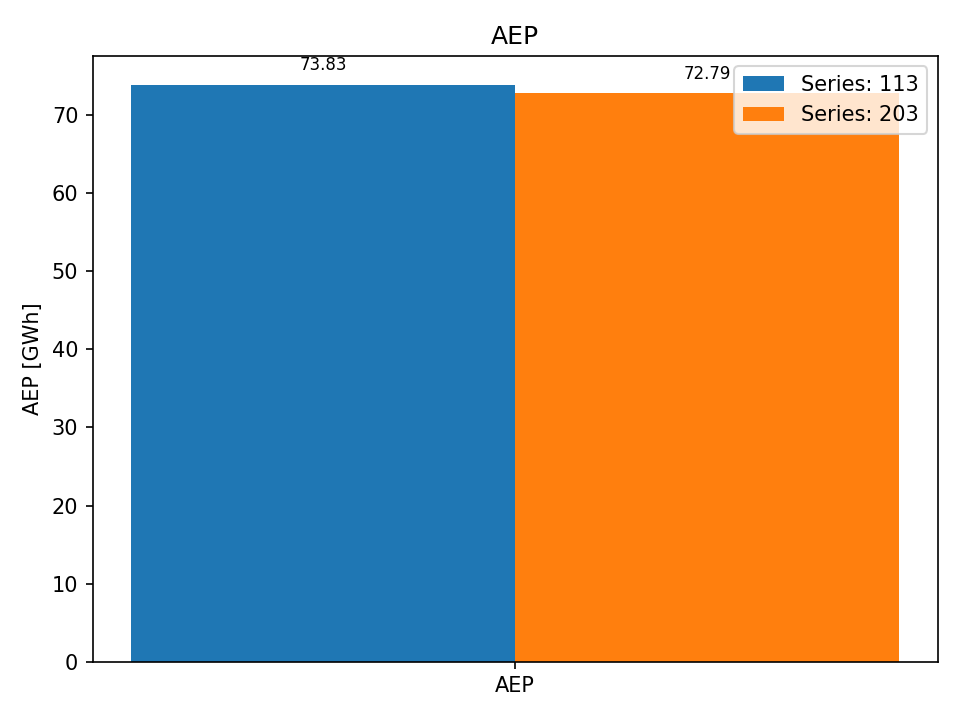

<IPython.core.display.Javascript object>


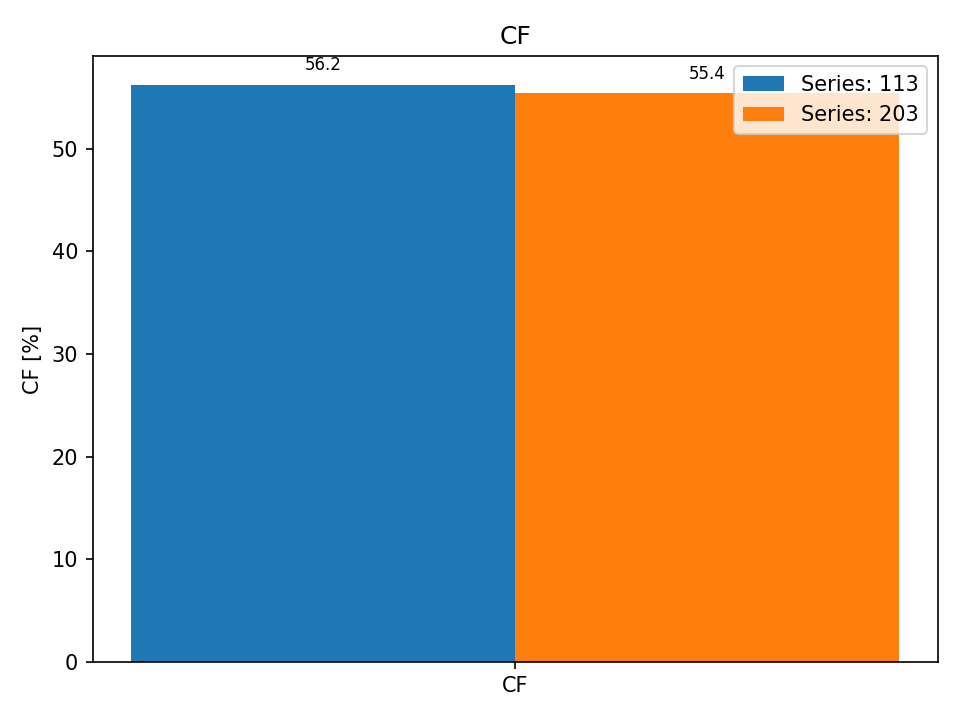

In [13]:
# Make bar plot

labels = ['AEP']

series1 =  round(AEP[0],2)

if len(selected_folders) > 1:
    series2 =  round(AEP[1],2)
if len(selected_folders) > 2:    
    series3 =  round(AEP[2],2)

print(labels)
print(folder_prefix)

y_label = 'AEP [GWh]'

if len(selected_folders) == 2:
    fig = st.plot.BarPlot2SeriesPars('AEP',y_label,labels,round(AEP[0],2),round(AEP[1],2),folder_prefix)
    fig = st.plot.BarPlot2SeriesPars('CF','CF [%]',['CF'],round(CF[0]*100,1),round(CF[1]*100,1),folder_prefix)
    
elif len(selected_folders) == 3:
    fig = st.plot.BarPlot3SeriesPars('AEP',y_label,labels,\
        round(AEP[0],2), round(AEP[1],2),round(AEP[2],2),folder_prefix)
    fig = st.plot.BarPlot3SeriesPars('CF','CF [%]',['CF'], \
        round(CF[0]*100,1), round(CF[1]*100,1),round(CF[2]*100,1),folder_prefix)


[0.67, 3.26, 8.13, 12.07, 13.86, 12.01, 9.09, 6.35, 4.18, 2.62, 1.57] 73.81
[0.66, 3.12, 8.03, 11.84, 13.39, 11.93, 9.09, 6.35, 4.18, 2.62, 1.57] 72.78


<IPython.core.display.Javascript object>


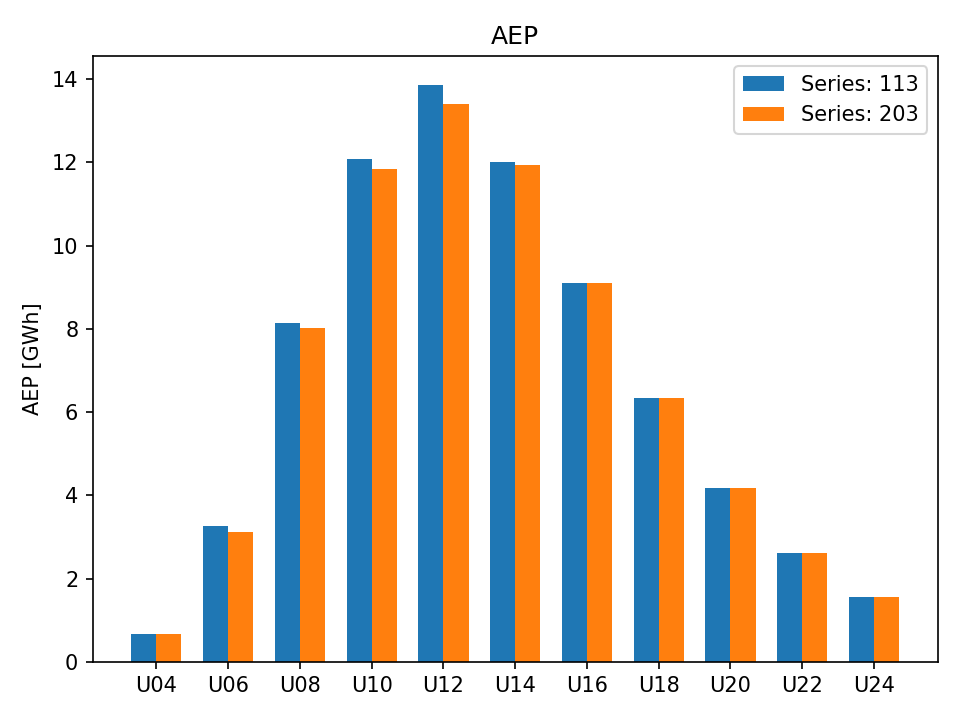

In [12]:
# AEP per wind speed bin

series1 = [round(num/1e9,2) for num in W_hrs_ws[0,:]]
if len(selected_folders) > 1:
    series2 = [round(num/1e9,2) for num in W_hrs_ws[1,:]]
if len(selected_folders) > 2: 
    series3 = [round(num/1e9,2) for num in W_hrs_ws[2,:]]

print(series1, sum(series1))
print(series2, sum(series2))
#print(series3, sum(series3))

    
if len(selected_folders) == 2:    
    st.plot.BarPlot2SeriesWS('AEP', x_labels,series1,series2,folder_prefix, y_label)
elif len(selected_folders) == 3:
    st.plot.BarPlot3SeriesWS('AEP', x_labels,series1,series2,series3,folder_prefix, y_label)
    